In [15]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
matplotlib.rcParams['figure.figsize']= (12.0, 6.0)

In [17]:
# read dataframe
df = pd.read_csv("creditcard.csv")

In [18]:
# predicator vs prediction
X = df.iloc[:, df.columns!='Class']
Y = df.iloc[:, df.columns == 'Class']

In [19]:
# preprocess the time value (seconds to hour)
df['Hour']=df['Time'].apply(lambda x: np.ceil(float(x)/3600)%24)

In [20]:
# legit and fraud transactions via pivot table per hour
df.pivot_table(values='Amount', index='Hour', columns ='Class', aggfunc='count')

Class,0,1
Hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


In [21]:
#show the normal distribution via histogram per hour
def PlotHistogram(df, norm):
    bins = np.arange(df['Hour'].min(), df['Hour'].max()+2)
    plt.figure(figsize=(10, 5))
    sns.distplot(df[df['Class']==0.0]['Hour'], 
               norm_hist=norm, 
               bins=bins, 
               kde=False, 
               color='b', 
               hist_kws={'alpha':.5}, 
               label='Legit Transactions')
    sns.distplot(df[df['Class']==1.0]['Hour'], 
                norm_hist=norm, 
                bins=bins, 
                kde=False, 
                color='r', 
                hist_kws={'alpha':.5}, 
                label='Fraud Transactions')
    plt.title("Normalized histrogram of legit/fraud transactions per hour of the day")
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()
    
    

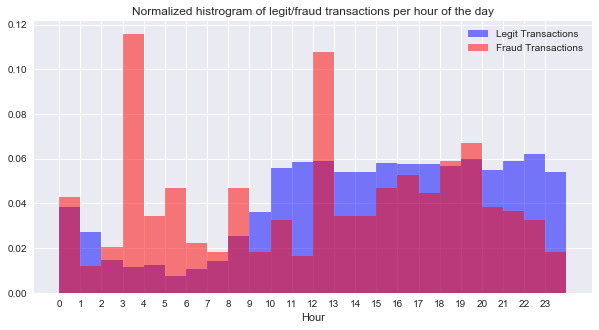

In [22]:
PlotHistogram(df, True)

In [23]:
# drop Hour from dataframe 
df = df.drop(['Hour'], axis=1)

In [24]:
# calculating 
#the toal number of normal vs. fraudulent transactions 
Total_Normal_Transactions = len(df[df['Class']==0])
Total_Fraud_Transactions = len(df[df['Class']==1])

# percentage of normal and fraudulent transactions 
Percent_Normal_Transactions = Total_Normal_Transactions/(Total_Fraud_Transactions+ Total_Normal_Transactions)
Percent_Fraud_Transactions = Total_Fraud_Transactions/(Total_Fraud_Transactions+ Total_Normal_Transactions)

In [25]:
print("% of normal transactions: ",Percent_Normal_Transactions*100)
print("% of fraud transactions: ", Percent_Fraud_Transactions*100)


% of normal transactions:  99.82725143693798
% of fraud transactions:  0.1727485630620034


In [26]:
# define scaler 
scaler = StandardScaler()


In [27]:
df['Amount_Scaled']= scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [38]:
#show the normal distribution via histogram per hour
# def PlotHistogram(df, norm):
#     bins = np.arange(df['Hour'].min(), df['Hour'].max()+2)
#     plt.figure(figsize=(10, 5))
#     sns.distplot(df[df['Amount']==0.0]['Hour'], 
#                norm_hist=norm, 
#                bins=bins, 
#                kde=False, 
#                color='b', 
#                hist_kws={'alpha':.5}, 
#                label='Amount')
#     plt.title("Normalized histrogram of transaction amount per hour of the day")
#     plt.xticks(range(0,24))
#     plt.legend()
#     plt.show()
    

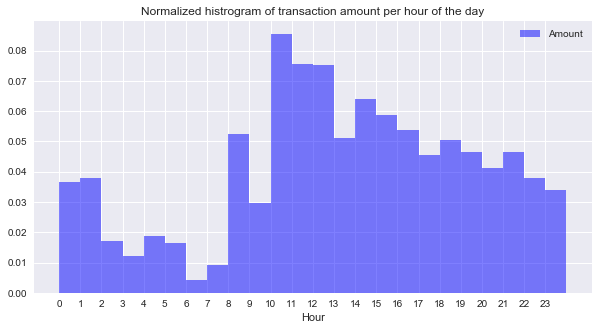

In [39]:
# PlotHistogram(df, True)

In [ ]:

sns.pairplot(df);

In [306]:
# drop time and amount
# amount -> amount_scaled 
df = df.drop(['Time', 'Amount'], axis=1)

In [307]:
# number of records in the fraud class 
num_fraud = len(df[df['Class']==1])

In [308]:
# indices of fraud and normal cases:
fraud_indices = np.array(df[df['Class']==1].index)
normal_indices= np.array(df[df['Class']==0].index)

In [309]:
# randomly select 'n' number of indices of the normal class.. 
# n being the total number of fraud cases 
# select the same number of random transactions from normal transactions
random_normal_indices = np.random.choice(normal_indices, num_fraud,replace=False)

In [310]:
random_normal_indices = np.array(random_normal_indices)

In [311]:
# append two indices 
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [312]:
# undersample the dataset 
under_sample_data = df.iloc[under_sample_indices, :]

In [313]:
fraud_per_now = len(under_sample_data[under_sample_data.Class==1])/(len(under_sample_data[under_sample_data.Class==1]) + len(under_sample_data[under_sample_data.Class==0]))

In [314]:
normal_per_now = len(under_sample_data[under_sample_data.Class==0])/ (len(under_sample_data[under_sample_data.Class==0]) + len(under_sample_data[under_sample_data.Class==1]))

In [315]:
print(fraud_per_now)
print(normal_per_now)

0.5
0.5


In [316]:
# organizing data 


In [317]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

In [318]:
print("Number of transactions in train data: ", len(x_train))
print("Number of transactions in test data: ", len(x_test))
print("Total number of transactions: ", len(x_train)+ len(x_test))

Number of transactions in train data:  199364
Number of transactions in test data:  85443
Total number of transactions:  284807


In [319]:
#predicates & predictions
x_undersample = under_sample_data.iloc[:, under_sample_data.columns!='Class']
y_undersample= under_sample_data.iloc[:, under_sample_data.columns=='Class']

In [320]:
# split undersampled data into train and test set 
x_train_undersample, x_test_undersample, y_train_undersample, y_test_undersample = train_test_split(x_undersample, y_undersample, test_size=0.3, random_state=0)

In [321]:
print("Number of transactions in undersampled train dataset: ", len(x_train_undersample))
print("Number of transactions in undersampled test dataset: ", len(x_test_undersample))
print("Total number of transactions in undersampled dataset: ", len(x_train_undersample)+ len(x_test_undersample))

Number of transactions in undersampled train dataset:  688
Number of transactions in undersampled test dataset:  296
Total number of transactions in undersampled dataset:  984


In [322]:
# predict values using the whole dataset 

In [323]:
# Using Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/Users/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [324]:
# predict
pred = lr_model.predict(x_test)

In [325]:
y_test_legit = len(y_test[y_test['Class']==0])
y_test_fraud = len(y_test[y_test['Class']==1])

In [326]:
# confusion matrix 
def PlotConfusionMatrix(y_test, pred, y_test_legit, y_test_fraud):
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0/y_test_legit, 1.0/y_test_legit], [1.0/y_test_fraud, 1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(cfn_matrix, cmap='coolwarm_r', linewidth=0.5, annot=True, ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    
    ax = fig.add_subplot(1, 2, 2)
    sns.heatmap(norm_cfn_matrix, cmap='coolwarm_r', linewidth=0.5, annot=True, ax=ax)
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('----------Classification Report --- All Data ---------')
    print(classification_report(y_test, pred))

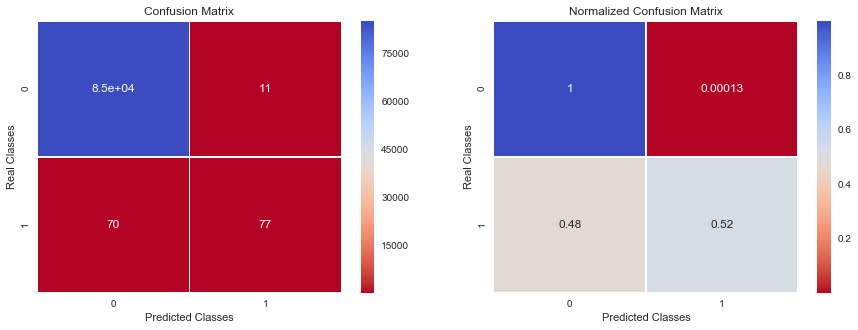

----------Classification Report --- All Data ---------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.52      0.66       147

avg / total       1.00      1.00      1.00     85443



In [327]:
# confusion matrix
PlotConfusionMatrix(y_test, pred, y_test_legit, y_test_fraud)

In [328]:
# ------ Predicting the values of undersampled dataset ------ #


In [329]:
# create model and fit the dataset
lr_model_undersample = LogisticRegression()
lr_model_undersample.fit(x_train_undersample, y_train_undersample)

/Users/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [330]:
# predict model 
pred_undersample = lr_model_undersample.predict(x_test_undersample)

In [331]:

y_test_legit_undersample = len(y_test_undersample[y_test_undersample['Class']==0])
y_test_fraud_undersample = len(y_test_undersample[y_test_undersample['Class']==1])

In [332]:
# confusion matrix plotting for undersampled dataset result 
def PlotConfusionMatrixUndersample(y_test_undersample, pred_undersample, y_test_legit_undersample, y_test_fraud_undersample):
    
    cfn_matrix_undersample = confusion_matrix(y_test_undersample, pred_undersample)
    cfn_norm_matrix_undersample = np.array([[1.0/y_test_legit_undersample, 1.0/y_test_legit_undersample], [1.0/ y_test_fraud_undersample, 1.0/y_test_fraud_undersample]])
    norm_cfn_matrix_undersample = cfn_matrix_undersample * cfn_norm_matrix_undersample
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(cfn_matrix_undersample, cmap='coolwarm_r', linewidth=0.5, annot=True, ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    
    ax = fig.add_subplot(1, 2, 2)
    sns.heatmap(norm_cfn_matrix_undersample, cmap='coolwarm_r', linewidth=0.5, annot=True, ax=ax)
    plt.title('Undersampled Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('------- Classification Report --- Undersampled Data --------')
    print(classification_report(y_test_undersample, pred_undersample))

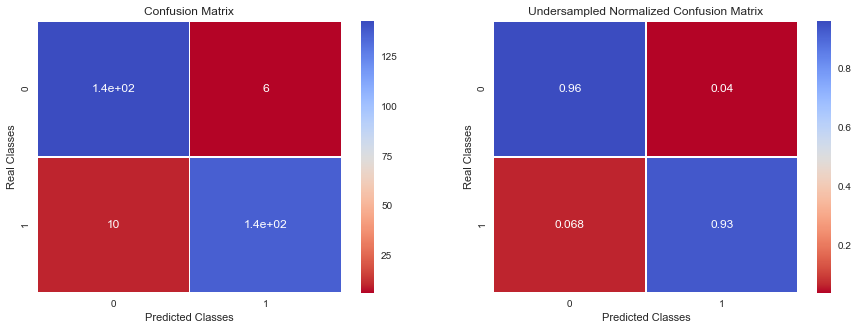

------- Classification Report --- Undersampled Data --------
             precision    recall  f1-score   support

          0       0.93      0.96      0.95       149
          1       0.96      0.93      0.94       147

avg / total       0.95      0.95      0.95       296



In [333]:
PlotConfusionMatrixUndersample(y_test_undersample, pred_undersample, y_test_legit_undersample, y_test_fraud_undersample)

In [334]:
x_test = x_test.drop(['Time'], axis=1)
x_test['Amount_scaled']= scaler.fit_transform(x_test['Amount'].values.reshape(-1, 1))
x_test = x_test.drop(['Amount'], axis=1)

/Users/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


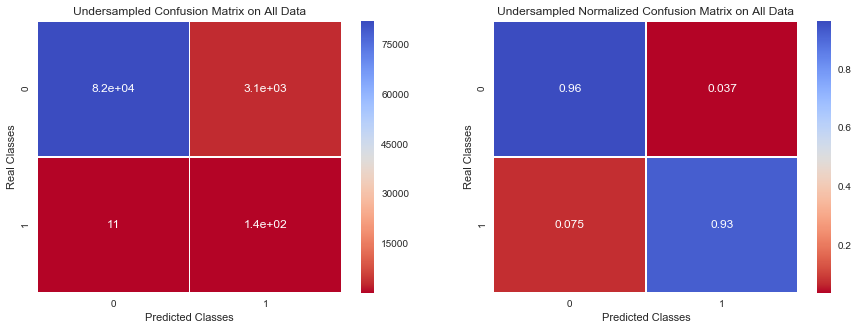

----------- Classification Report --- Undersampled Classifier on All Data -----------
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85296
          1       0.04      0.93      0.08       147

avg / total       1.00      0.96      0.98     85443



In [335]:
lr_model_all_undersample = LogisticRegression()
lr_model_all_undersample.fit(x_train_undersample,y_train_undersample)
pred_all_undersample = lr_model_all_undersample.predict(x_test)


def PlotConfusionMatrixAllUndersample(Y_test,pred_all_undersample,Y_test_legit,Y_test_fraud):

    cfn_matrix = confusion_matrix(Y_test,pred_all_undersample)
    cfn_norm_matrix = np.array([[1.0 / Y_test_legit, 1.0 / Y_test_legit],[1.0/Y_test_fraud,1.0/Y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Undersampled Confusion Matrix on All Data')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Undersampled Normalized Confusion Matrix on All Data')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

    print('----------- Classification Report --- Undersampled Classifier on All Data -----------')
    print(classification_report(Y_test,pred_all_undersample))
    
PlotConfusionMatrixAllUndersample(y_test,pred_all_undersample,y_test_legit,y_test_fraud)